# INF2178 A2
Zhuoying Li
1004021202

## Data Reading & Preprocessing

In [1]:
import pandas as pd

# Read INF2178_A2_data.xlsx
df = pd.read_excel('INF2178_A2_data.xlsx')
df.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


In [2]:
# Only keep the columns we need
df = df[['_id', 'AUSPICE', 'ward', 'IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE', 'subsidy']]
# Rename columns
df.columns = ['id', 'auspice', 'ward', 'infant', 'toddler', 'preschool', 'kindergarten', 'schoolage', 'total', 'subsidy']
df.head()

,id,auspice,ward,infant,toddler,preschool,kindergarten,schoolage,total,subsidy
0,1,Non Profit Agency,3,0,20,32,52,60,164,Y
1,2,Non Profit Agency,8,0,0,12,26,45,83,Y
2,3,Non Profit Agency,25,0,10,16,26,50,102,Y
3,4,Non Profit Agency,10,10,15,40,0,0,65,Y
4,5,Non Profit Agency,20,0,10,16,0,0,26,Y


In [3]:
# ward should be object type because it is a categorical variable, change it
df['ward'] = df['ward'].astype(str)

## Exploratory Data Analysis

In [4]:
df.describe()

,id,infant,toddler,preschool,kindergarten,schoolage,total
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,532.000000,3.896519,11.600188,24.258702,14.257761,21.661336,75.674506
std,307.005972,6.091782,12.088152,18.577416,20.493290,30.423503,47.816518
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,266.500000,0.000000,0.000000,16.000000,0.000000,0.000000,43.000000
50%,532.000000,0.000000,10.000000,24.000000,0.000000,0.000000,62.000000
75%,797.500000,10.000000,15.000000,32.000000,26.000000,30.000000,97.000000
max,1063.000000,30.000000,90.000000,144.000000,130.000000,285.000000,402.000000


In [5]:
# Count by auspice
df['auspice'].value_counts()

auspice
Non Profit Agency                703
Commercial Agency                321
Public (City Operated) Agency     39
Name: count, dtype: int64

In [6]:
# Count by subsidy
df['subsidy'].value_counts()

subsidy
Y    718
N    345
Name: count, dtype: int64

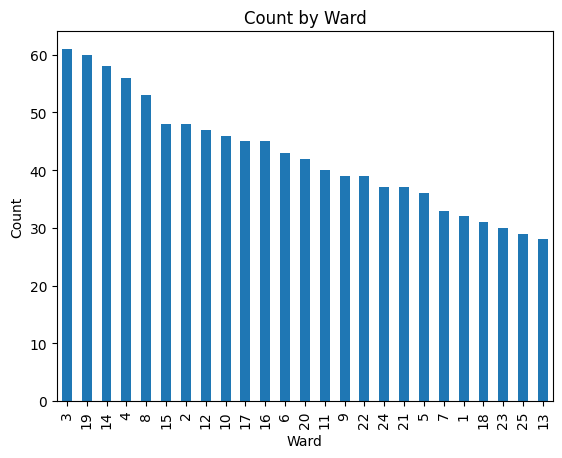

In [7]:
# Draw bar plot for ward
import matplotlib.pyplot as plt
df['ward'].value_counts().plot(kind='bar')
plt.title('Count by Ward')
plt.xlabel('Ward')
plt.ylabel('Count')
plt.show()

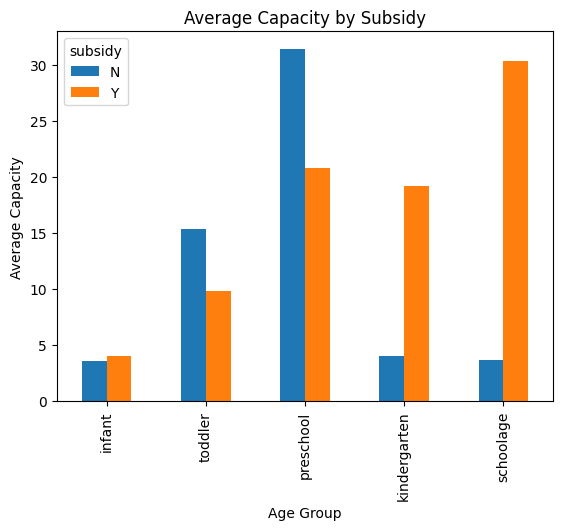

In [8]:
# Bar graph of average capacity for different age groups by subsidy
df_mean = df[['infant', 'toddler', 'preschool', 'kindergarten', 'schoolage']]
df_mean.groupby(df['subsidy']).mean()
df_mean.groupby(df['subsidy']).mean().T.plot(kind='bar')
plt.title('Average Capacity by Subsidy')
plt.xlabel('Age Group')
plt.ylabel('Average Capacity')
plt.show()

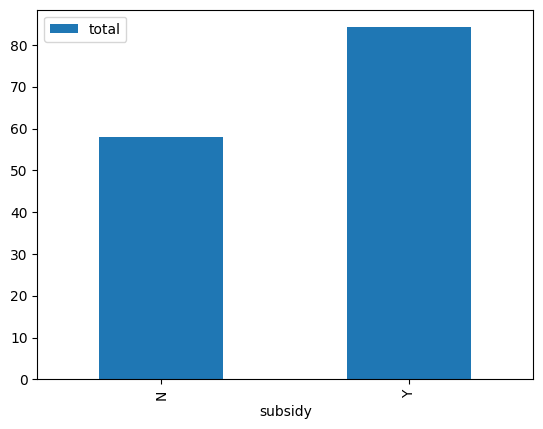

In [9]:
# Bar graph of average total capacity by subsidy
df_mean = df[['total']]
df_mean.groupby(df['subsidy']).mean().plot(kind='bar')
plt.show()

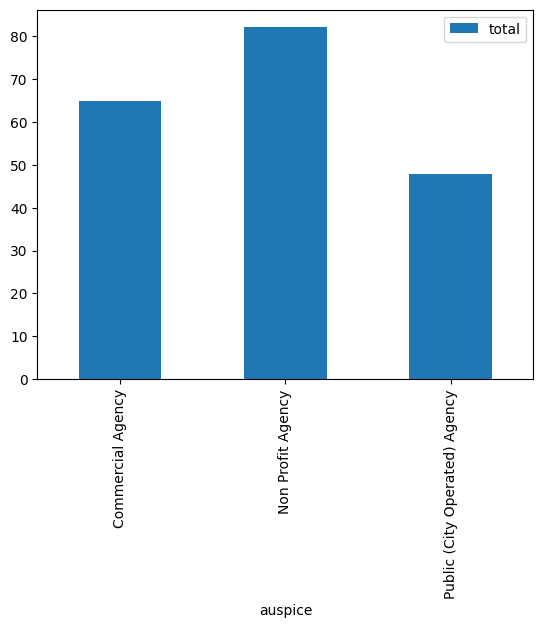

In [10]:
# Bar graph of average total capacity by auspice
df_mean = df[['total']]
df_mean.groupby(df['auspice']).mean().plot(kind='bar')
plt.show()

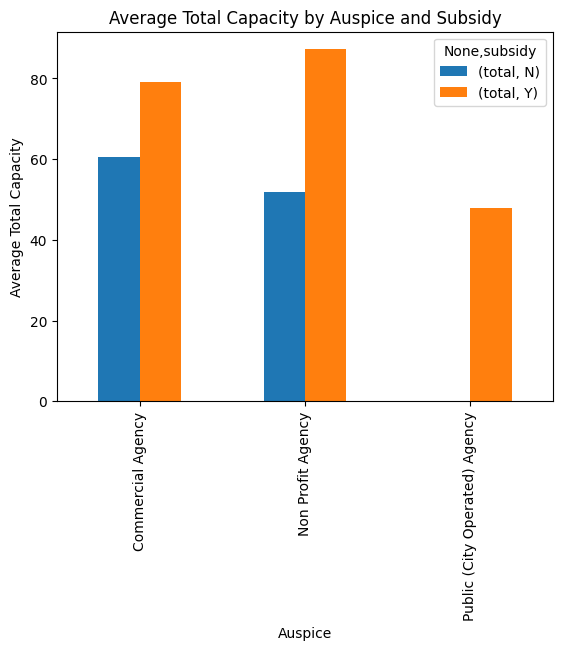

In [11]:
# Bar graph of average total capacity by auspice and subsidy
df_mean = df[['total']]
df_mean.groupby([df['auspice'], df['subsidy']]).mean().unstack().plot(kind='bar')
plt.title('Average Total Capacity by Auspice and Subsidy')
plt.xlabel('Auspice')
plt.ylabel('Average Total Capacity')
plt.show()

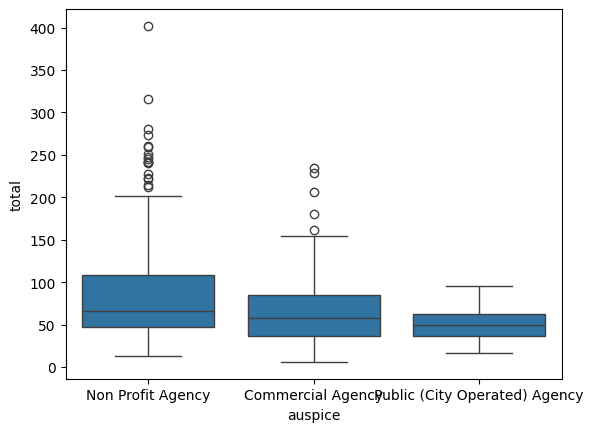

In [12]:
# Box plot of total capacity by auspice
import seaborn as sns

df_mean = df[['total', 'auspice']]
sns.boxplot(x='auspice', y='total', data=df_mean)
plt.show()

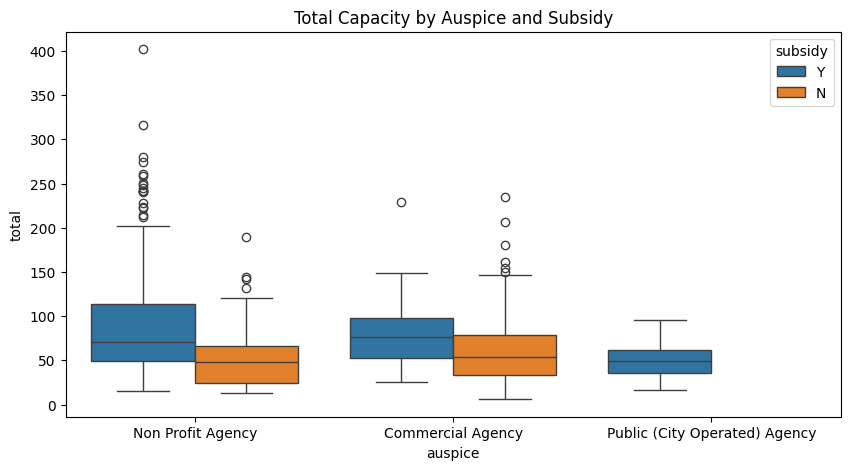

In [13]:
# Box plot for total capacity by auspice and subsidy
plt.figure(figsize=(10, 5))
df_mean = df[['total', 'auspice', 'subsidy']]
plt.title('Total Capacity by Auspice and Subsidy')
sns.boxplot(x='auspice', y='total', hue='subsidy', data=df_mean)
plt.show()

## One-Way ANOVA

Question 1: Is there a significant difference between childcare spaces for different age groups when comparing various auspice (commercial, nonprofit, or public)?

- H_0: There is no significant difference between mean of childcare spaces for different age groups, across different operating auspice (treatment).
- H_1: At least one pair of means of the childcare spaces available is significantly different from each other.

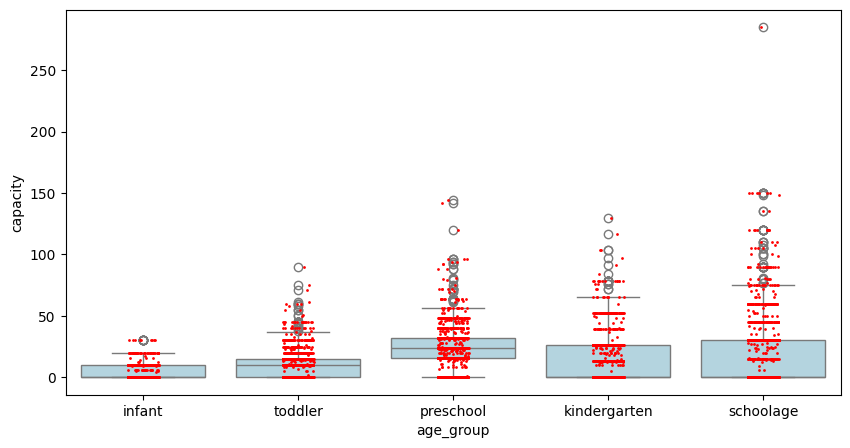

In [14]:
df_melt = pd.melt(df.reset_index(), id_vars=['id'], value_vars=['infant', 'toddler', 'preschool', 'kindergarten', 'schoolage'])
df_melt.columns = ['id', 'age_group', 'capacity']

# Draw box plot for capacity by age group
plt.figure(figsize=(10, 5))
sns.boxplot(x='age_group', y='capacity', data=df_melt, color='lightblue')
sns.stripplot(x='age_group', y='capacity', data=df_melt, color='red', size=2)
plt.show()

In [15]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Create one-way ANOVA model and print the table
one_way_model = ols('capacity ~ C(age_group)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(one_way_model, typ=2)
print(anova_table)

                    sum_sq      df           F         PR(>F)
C(age_group)  2.821233e+05     4.0  188.190768  4.517383e-151
Residual      1.990101e+06  5310.0         NaN            NaN


In [16]:
# Do post hoc test using Tukey HSD, print the results
# This part doesn't work on latest Windows 11 + Python 3 installed using chocolatey
# so resort to using scipy instead.

# from bioinfokit.analys import stat
# res = stat()
# res.tukey_hsd(df=df_melt, res_var='capacity', xfac_var='age_group', anova_model='capacity ~ C(age_group)')
# res.tukey_summary

from scipy.stats import tukey_hsd
groups = df_melt.groupby('age_group')['capacity'].apply(list)
result = tukey_hsd(*groups)
print(result)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    -10.361     0.000   -12.653    -8.070
 (0 - 2)    -20.362     0.000   -22.654   -18.071
 (0 - 3)    -17.765     0.000   -20.056   -15.473
 (0 - 4)     -7.704     0.000    -9.995    -5.412
 (1 - 0)     10.361     0.000     8.070    12.653
 (1 - 2)    -10.001     0.000   -12.292    -7.710
 (1 - 3)     -7.404     0.000    -9.695    -5.112
 (1 - 4)      2.658     0.014     0.366     4.949
 (2 - 0)     20.362     0.000    18.071    22.654
 (2 - 1)     10.001     0.000     7.710    12.292
 (2 - 3)      2.597     0.017     0.306     4.889
 (2 - 4)     12.659     0.000    10.367    14.950
 (3 - 0)     17.765     0.000    15.473    20.056
 (3 - 1)      7.404     0.000     5.112     9.695
 (3 - 2)     -2.597     0.017    -4.889    -0.306
 (3 - 4)     10.061     0.000     7.770    12.353
 (4 - 0)      7.704     0.000     5.412     9.995
 (4 - 1)     -2.658     0.014   

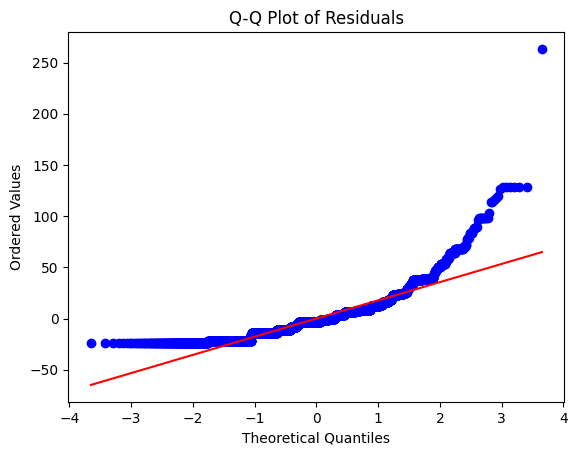

In [17]:
# Check assumptions

# Draw qq plot for the residuals
from scipy import stats
residuals = df_melt['capacity'] - one_way_model.fittedvalues
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

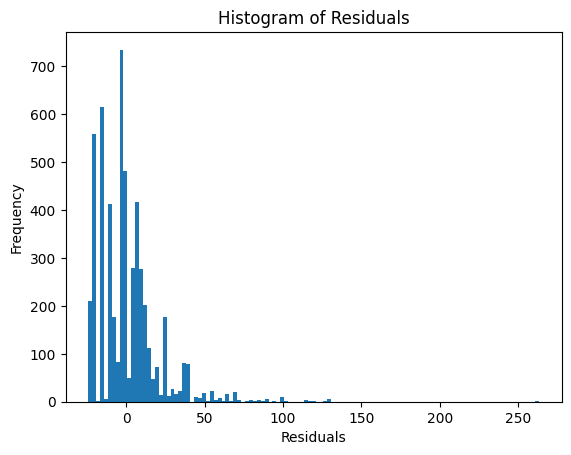

In [18]:
# Draw historgram for the residuals
plt.hist(residuals, bins='auto')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Check to see if residuals are normally distributed
# Shapiro-Wilk test
w, pvalue = stats.shapiro(residuals)
print('Shapiro-Wilk test statistic:', w)
print('Shapiro-Wilk test p-value:', pvalue)

Shapiro-Wilk test statistic: 0.842705459409425
Shapiro-Wilk test p-value: 2.428744671679071e-58


C:\Users\junca\AppData\Local\Temp\ipykernel_23088\2992342145.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5315.
  w, pvalue = stats.shapiro(residuals)


In [20]:
# Check for homogeneity of variance
# Levene's test
w, pvalue = stats.levene(*groups)
print('Levene test statistic:', w)
print('Levene test p-value:', pvalue)

Levene test statistic: 142.62280220846515
Levene test p-value: 5.564354307511864e-116


## Two-Way ANOVA

Question 2: Is there a significant different between total available spaces for different operating auspice and the availability of a subsidy contract?

- H0_1: There is no significant difference in the mean of total childcare spaces depending on its subsidy contract with the city.
- H0_2: There is no significant difference in the mean of total childcare spaces depending on its operating auspice.
- H0_3: There are no interaction effects.



In [21]:
df_melt = pd.melt(df, id_vars=['subsidy'],
                    value_vars=['infant', 'toddler', 'preschool', 'kindergarten', 'schoolage'],
                    var_name='age_group', value_name='capacity')

# Create two-way ANOVA model and print the table
two_way_model = ols('capacity ~ C(age_group) + C(subsidy) + C(age_group):C(subsidy)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(two_way_model, typ=2)
print(anova_table)

                               sum_sq      df           F         PR(>F)
C(age_group)             2.821233e+05     4.0  215.341584  1.758733e-171
C(subsidy)               3.215308e+04     1.0   98.168364   6.073586e-23
C(age_group):C(subsidy)  2.204016e+05     4.0  168.230101  8.040792e-136
Residual                 1.737546e+06  5305.0         NaN            NaN


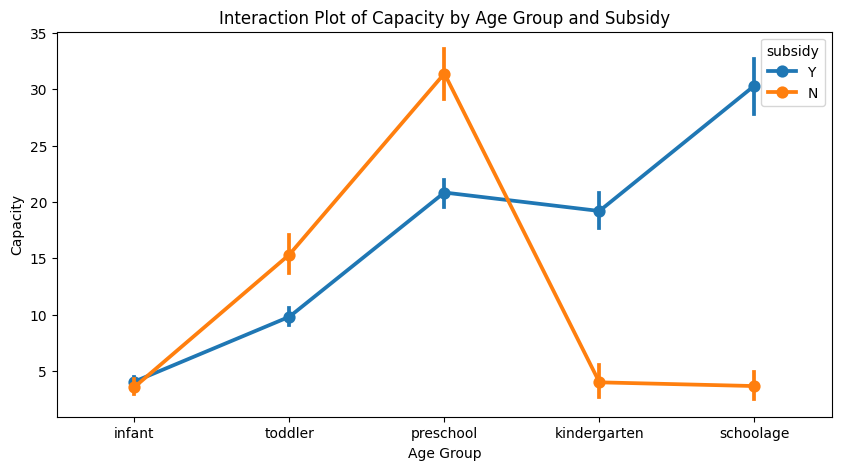

In [22]:
# Draw interaction plots of capacity by age group and subsidy
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.pointplot(x='age_group', y='capacity', hue='subsidy', data=df_melt)
plt.title('Interaction Plot of Capacity by Age Group and Subsidy')
plt.xlabel('Age Group')
plt.ylabel('Capacity')
plt.show()

In [23]:
# Do post hoc test using Tukey HSD, print the results
from scipy.stats import tukey_hsd

multi_index = df_melt.set_index(['age_group', 'subsidy'])
combinations = multi_index.index.unique()
groups = [multi_index.loc[combo, 'capacity'].values for combo in combinations]
result = tukey_hsd(*groups)
print(result)

C:\Users\junca\AppData\Local\Temp\ipykernel_23088\89256431.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  groups = [multi_index.loc[combo, 'capacity'].values for combo in combinations]


Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.486     1.000    -3.266     4.239
 (0 - 2)     -5.755     0.000    -8.778    -2.732
 (0 - 3)    -11.273     0.000   -15.026    -7.521
 (0 - 4)    -16.777     0.000   -19.800   -13.754
 (0 - 5)    -27.337     0.000   -31.089   -23.585
 (0 - 6)    -15.138     0.000   -18.161   -12.115
 (0 - 7)      0.066     1.000    -3.686     3.818
 (0 - 8)    -26.258     0.000   -29.281   -23.235
 (0 - 9)      0.396     1.000    -3.356     4.149
 (1 - 0)     -0.486     1.000    -4.239     3.266
 (1 - 2)     -6.241     0.000    -9.993    -2.489
 (1 - 3)    -11.759     0.000   -16.121    -7.398
 (1 - 4)    -17.263     0.000   -21.016   -13.511
 (1 - 5)    -27.823     0.000   -32.184   -23.462
 (1 - 6)    -15.624     0.000   -19.376   -11.872
 (1 - 7)     -0.420     1.000    -4.782     3.941
 (1 - 8)    -26.744     0.000   -30.496   -22.992
 (1 - 9)     -0.090     1.000   

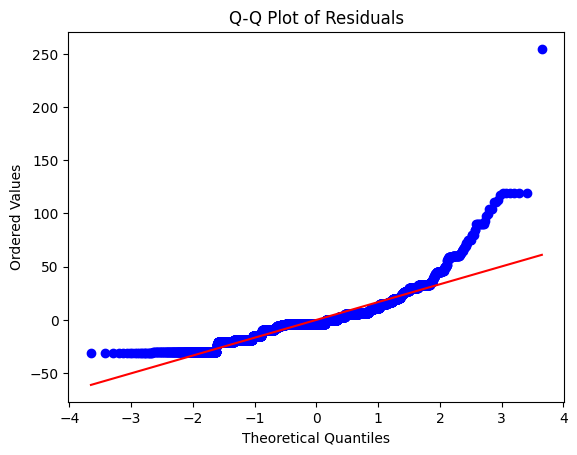

In [24]:
# Check assumptions
# Draw qq plot
residuals = df_melt['capacity'] - two_way_model.fittedvalues
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

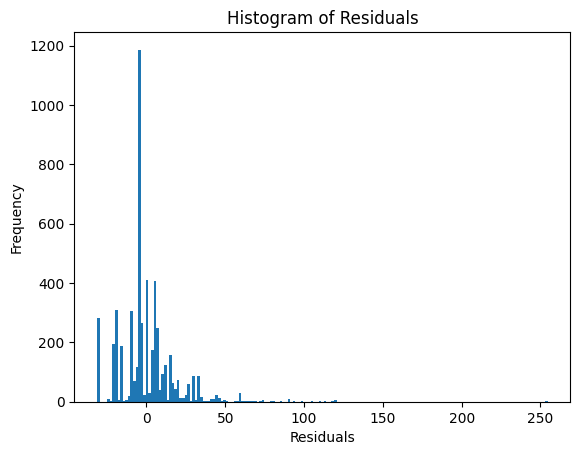

In [25]:
# Draw histogram
plt.hist(residuals, bins='auto')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Shapiro-Wilk test
w, pvalue = stats.shapiro(residuals)
print('Shapiro-Wilk test statistic:', w)
print('Shapiro-Wilk test p-value:', pvalue)

Shapiro-Wilk test statistic: 0.8573735336141447
Shapiro-Wilk test p-value: 1.4888348267066942e-56


C:\Users\junca\AppData\Local\Temp\ipykernel_23088\4150770102.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5315.
  w, pvalue = stats.shapiro(residuals)


In [27]:
# Levene's test
w, pvalue = stats.levene(*groups)
print('Levene test statistic:', w)
print('Levene test p-value:', pvalue)

Levene test statistic: 167.82909447553476
Levene test p-value: 1.02762669672092e-280
